## Задача бинарной классификации на данных [Adult] (https://archive.ics.uci.edu/ml/datasets/adult). Необходимо определить, зарабатывает человек больше 50 тысяч или нет.

Признаки:

* **age**;
* **workclass** *(Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.)*;
* **fnlwgt**;
* **education** *(Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)*;
* **education-num**;
* **marital-status** *(Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)*;
* **occupation** *(Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)*;
* **relationship** *(Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)*;
* **race** *(White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)*;
* **sex**;
* **capital-gain**;
* **capital-loss**;
* **hours-per-week**;
* **native-country**.



In [147]:
# Импорт
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Массив
column_names =  ['age',
    'workclass',
    'fnlwgt',
    'education',
    'educ-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary'
]
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=column_names)
df.head(7)

,age,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K


**Baseline**

In [148]:
#Пропуски
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   educ-num        32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [149]:
# Проверим сколько значений ' ?'
(df == ' ?').sum()

age                  0
workclass         1836
fnlwgt               0
education            0
educ-num             0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [116]:
# В этом датасете именной такой странный символ является символом пропуска.
# Давайте заменим его на None, например, при помощи метода replace({})

df = df.replace({' ?': None})

In [117]:
# Уникальные значения в каждом из столбцов метод nunique()
df.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
educ-num             16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       41
salary                2
dtype: int64

In [118]:
# salary и sex - бинарные признаки
df = df.replace({' Male':1, ' Female':0, ' <=50K':0, ' >50K':1})

# Категориальные признаки
df.select_dtypes(object)

,workclass,education,marital-status,occupation,relationship,race,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba
...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,United-States


In [119]:
# Выберем те категориальные признаки, в которых меньше 10 уникальных значений, а остальные удалим
df.drop(columns=df.select_dtypes(object).nunique()[df.select_dtypes(object).nunique() >= 10].index, inplace=True)
df

,age,workclass,fnlwgt,educ-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
0,39,State-gov,77516,13,Never-married,Not-in-family,White,1,2174,0,40,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Husband,White,1,0,0,13,0
2,38,Private,215646,9,Divorced,Not-in-family,White,1,0,0,40,0
3,53,Private,234721,7,Married-civ-spouse,Husband,Black,1,0,0,40,0
4,28,Private,338409,13,Married-civ-spouse,Wife,Black,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Wife,White,0,0,0,38,0
32557,40,Private,154374,9,Married-civ-spouse,Husband,White,1,0,0,40,1
32558,58,Private,151910,9,Widowed,Unmarried,White,0,0,0,40,0
32559,22,Private,201490,9,Never-married,Own-child,White,1,0,0,20,0


In [120]:
# Оставшиеся категориальные признаки закодируем пока что OHE при помощи pd.get_dummies

df = pd.get_dummies(
    df,
    columns=df.select_dtypes(object).columns,
    drop_first=True
)

df

,age,fnlwgt,educ-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ Local-gov,workclass_ Never-worked,...,marital-status_ Widowed,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,77516,13,1,2174,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,215646,9,1,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,53,234721,7,1,0,0,40,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,1,0,0,0,1
32557,40,154374,9,1,0,0,40,1,0,0,...,0,0,0,0,0,0,0,0,0,1
32558,58,151910,9,0,0,0,40,0,0,0,...,1,0,0,0,1,0,0,0,0,1
32559,22,201490,9,1,0,0,20,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [121]:
# Проверим остались ли пропуски и если да, то удалим их

print(df.isna().sum())
df = df.dropna()

age                                      0
fnlwgt                                   0
educ-num                                 0
sex                                      0
capital-gain                             0
capital-loss                             0
hours-per-week                           0
salary                                   0
workclass_ Local-gov                     0
workclass_ Never-worked                  0
workclass_ Private                       0
workclass_ Self-emp-inc                  0
workclass_ Self-emp-not-inc              0
workclass_ State-gov                     0
workclass_ Without-pay                   0
marital-status_ Married-AF-spouse        0
marital-status_ Married-civ-spouse       0
marital-status_ Married-spouse-absent    0
marital-status_ Never-married            0
marital-status_ Separated                0
marital-status_ Widowed                  0
relationship_ Not-in-family              0
relationship_ Other-relative             0
relationshi

In [122]:
# Посмотрим соотношение классов
print(f"Всего класса 0 в датасете: {(df['salary'] == 0).sum()}, а класса 1: {(df['salary'] == 1).sum()}")

Всего класса 0 в датасете: 24720, а класса 1: 7841


In [123]:
X = df.drop(columns='salary')
y = df['salary']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,stratify=y,random_state=0)

Отмасштабируем признаки. Два подхода:

 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — среднее и стандартное отклонение значения признака по всей выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))

 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — интервал значений признака.

## Логистическая регрессия

In [124]:
# Импортируем класс StandardScaler из модуля preprocessing библиотеки sklearn
from sklearn.preprocessing import StandardScaler
# Отмасштабируем наши признаки
# Создадим объект класса StandardScaler

scaler = StandardScaler()

# Сделаем .fit() на обучении
scaler.fit(X_train, y_train) # считает среднее по выборке и std

# .transform() на обучении и тесте (возвращает numpy, поэтому надо самим конвертировать обратно в dataframe с нужными индексами колонками)
X_train = scaler.transform(X_train)#pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test  = scaler.transform(X_test)#pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [125]:
from sklearn.linear_model import LogisticRegression

# Содадим объект класса LogisticRegression с параметрами по умолчанию
model_LR = LogisticRegression()

# Обучим его на обучающем датасете
model_LR.fit(X_train, y_train)

# Получим предсказания и посмотрим на долю правильных ответов:
y_pred_test_LR = model_LR.predict(X_test)
y_pred_train_LR = model_LR.predict(X_train)

## Confusion Matrix
* `TP` - это `True Positive` или верно помеченные объекты класса 1 (положительного класса)
* `TN` - это `True Negative` или верно помеченные объекты класса 0 (отрицательного класса)
* `FP` - это `False Positive` или неверно помеченные объекты класса 0
* `FN` - это `False Negative` или неверно помеченные объекты класса 1

Text(0.5, 43.7222222222222, 'Predicted value')

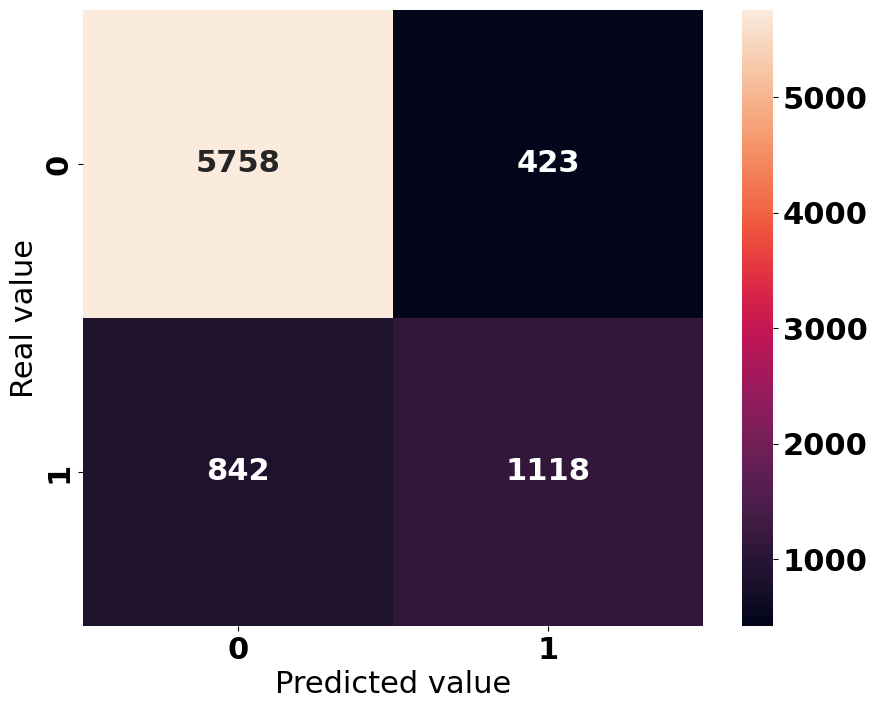

In [126]:
# Импортирт confusion_matrix из модуля metrics библиотеки sklearn
from sklearn.metrics import confusion_matrix

# Матрица ошибок
mp_mtx = confusion_matrix(y_test, y_pred_test_LR)
font = {'family' : 'Calibri', 'weight' : 'bold', 'size'   :22}
plt.rc('font', **font)
fig = plt.figure(figsize=(10,8))
sns.heatmap(mp_mtx, annot=True, fmt="d",
            xticklabels=df["salary"].unique(),
            yticklabels=df["salary"].unique())
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [127]:
# В библиотеки sklearn эта метрика
from sklearn.metrics import accuracy_score

# Посчитаем для нашей модели на обучающем и тестировочном кусках
print(f"TEST:  Accuracy -- {accuracy_score(y_test, y_pred_test_LR)}")
print(f"TRAIN: Accuracy -- {accuracy_score(y_train, y_pred_train_LR)}")

TEST:  Accuracy -- 0.8446136838226262
TRAIN: Accuracy -- 0.8457411957411958


In [128]:
# В библиотеки sklearn эта метрика
from sklearn.metrics import precision_score

# Посчитаем для нашей модели на обучающем и тестировочном кусках
print(f"TEST:  Precision -- {precision_score(y_test, y_pred_test_LR)}")
print(f"TRAIN: Precision -- {precision_score(y_train, y_pred_train_LR)}")

TEST:  Precision -- 0.7255029201817002
TRAIN: Precision -- 0.7245114698385726


In [129]:
# В библиотеки sklearn эта метрика
from sklearn.metrics import recall_score

# Посчитаем для нашей модели на обучающем и тестировочном кусках
print(f"TEST:  Recall -- {recall_score(y_test, y_pred_test_LR)}")
print(f"TRAIN: Recall -- {recall_score(y_train, y_pred_train_LR)}")

TEST:  Recall -- 0.5704081632653061
TRAIN: Recall -- 0.5800034007821799


## kNN-классификатор

In [130]:
#knn классификатор
from sklearn.neighbors import KNeighborsClassifier

In [131]:
#  число соседей равным 3
model_knn = KNeighborsClassifier(3)

# Обучим его на обучающем сете
model_knn.fit(X_train, y_train)

# Получим предсказания для обучающего и тестового датасета
y_pred_train_KNN = model_knn.predict(X_train)
y_pred_test_KNN  = model_knn.predict(X_test)

# Посмотрим accuracy на обучении и на тесте
print(f"TEST:  Accuracy -- {accuracy_score(y_test, y_pred_test_KNN)}")
print(f"TRAIN: Accuracy -- {accuracy_score(y_train, y_pred_train_KNN)}")

TEST:  Accuracy -- 0.8158702862056258
TRAIN: Accuracy -- 0.898976248976249


In [132]:
# F1
from sklearn.metrics import f1_score

# Посчитаем для нашей модели knn на обучающем и тестировочном кусках
print(f"TEST:  F1 -- {f1_score(y_test, y_pred_test_KNN)}")
print(f"TRAIN: F1 -- {f1_score(y_train, y_pred_train_KNN)}")

TEST:  F1 -- 0.5975838926174496
TRAIN: F1 -- 0.7774871471092271


### `ROC-AUC`

`ROC-AUC` или *площадь под ROC кривой* -- это *мера показывающая насколько точно упорядочены элементы выборки по своим скорам*.

In [133]:
# В библиотеки sklearn эта метрика
from sklearn.metrics import roc_auc_score

# Посмотрим эту метрику и для логистической регрессии и для knn

# Для ROC-AUC нам нужны вероятности принадлежности положительному классу
# Для получения вероятностей воспользуемся методом predict_proba и нам нужен второй столбец
y_pred_prob_test_LR = model_LR.predict_proba(X_test)[:, 1]
y_pred_prob_test_KNN = model_knn.predict_proba(X_test)[:, 1]
y_pred_prob_train_LR = model_LR.predict_proba(X_train)[:, 1]
y_pred_prob_train_KNN = model_knn.predict_proba(X_train)[:, 1]

# Посчитаем для нашей модели knn на обучающем и тестировочном кусках
print("Logistic Regression")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_test, y_pred_prob_test_LR)}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, y_pred_prob_train_LR)}")
print("kNN")
print(f"TEST:  ROC-AUC -- {roc_auc_score(y_test, y_pred_prob_test_KNN)}")
print(f"TRAIN: ROC-AUC -- {roc_auc_score(y_train, y_pred_prob_train_KNN)}")

Logistic Regression
TEST:  ROC-AUC -- 0.896798285727493
TRAIN: ROC-AUC -- 0.9007232591809402
kNN
TEST:  ROC-AUC -- 0.8214525091706315
TRAIN: ROC-AUC -- 0.9574757310422835


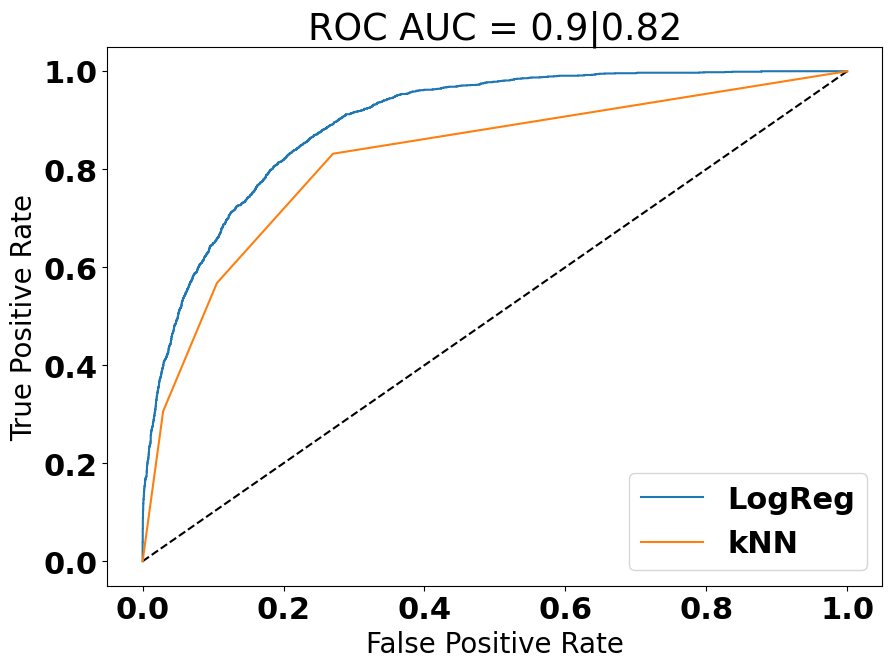

In [134]:
# ROC-кривая
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_test_LR)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_test_KNN)

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label="LogReg")
plt.plot(fpr_knn, tpr_knn, label="kNN")
plt.title(f'ROC AUC = {round(auc(fpr_lr, tpr_lr),2)}|{round(auc(fpr_knn, tpr_knn), 2)}')
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)
plt.legend()
plt.show()

 **Логистическая регрессия справляется лучше.
Обработаем данные.**

**EDA**

In [135]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=column_names)

In [136]:
# Заменим пропуск модой
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)
# Бинарная кодировка
df = df.replace({' Male':1, ' Female':0, ' <=50K':0, ' >50K':1})
# Категориальные OHE
df = pd.get_dummies(
    df,
    columns=['marital-status', 'occupation', 'relationship', 'race'],
    drop_first=True
)

In [137]:
X = df.drop(['salary'], axis=1)

y = df['salary']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=0)

In [138]:
!pip install category-encoders

In [139]:
import category_encoders

categorical_1 = ['workclass', 'education']
for feature in categorical_1:
        oe = category_encoders.ordinal.OrdinalEncoder()
        X_train[feature] = oe.fit_transform(X_train[feature])
        X_test[feature] = oe.transform(X_test[feature])

categorical_2 = ['native-country']
for feature in categorical_2:
        c_enc = category_encoders.count.CountEncoder()
        X_train[feature] = c_enc.fit_transform(X_train[feature])
        X_test[feature] = c_enc.transform(X_test[feature])

In [140]:
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

Обучим Логистическую регрессию.

In [141]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Precision: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Recall: {0:0.4f}'. format(recall_score(y_test, y_pred)))
print('F-1: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Accuracy: 0.8435
Precision: 0.7140
Recall: 0.5842
F-1: 0.6426


**Понизим число признаков с PCA  **

In [142]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([0.07989525, 0.05495832, 0.04987543, 0.04431779, 0.03922164,
       0.03711575, 0.03316046, 0.03063444, 0.03008238, 0.02959446,
       0.02897487, 0.02867033, 0.02770358, 0.02759144, 0.02709259,
       0.02685033, 0.02636903, 0.02623122, 0.02610018, 0.02580887,
       0.02562001, 0.02521578, 0.02510601, 0.02480606, 0.0244524 ,
       0.02328935, 0.02132582, 0.02081526, 0.02005444, 0.01812477,
       0.01720999, 0.01484455, 0.01191694, 0.01037169, 0.00886087,
       0.00510373, 0.00140095, 0.00098259, 0.00025043])

<ipython-input-143-b1558d6be251>:3: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,40,1)


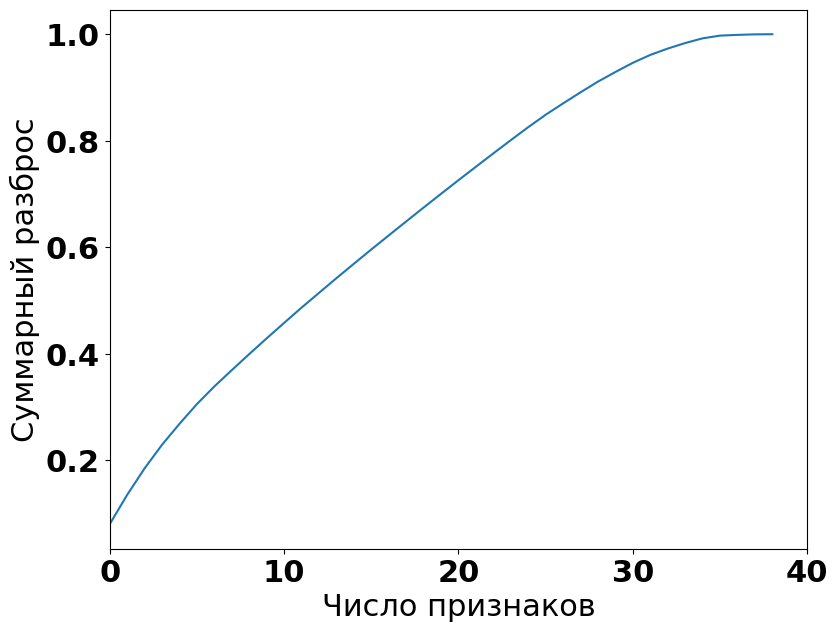

In [143]:
plt.figure(figsize=(9,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,40,1)
plt.xlabel('Число признаков')
plt.ylabel('Суммарный разброс')
plt.show()

**Количество признаков, описывающих 85% дисперсии = 27 **



In [144]:
pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.85) + 1
print('Количество признаков, описывающих 85% дисперсии =', dim)

Количество признаков, описывающих 85% дисперсии = 27


In [145]:
pca = PCA(n_components=27)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [146]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print('Precision: {0:0.4f}'. format(precision_score(y_test, y_pred)))
print('Recall: {0:0.4f}'. format(recall_score(y_test, y_pred)))
print('F-1: {0:0.4f}'. format(f1_score(y_test, y_pred)))

Accuracy: 0.8435
Precision: 0.7140
Recall: 0.5842
F-1: 0.6426


**Признаков 27 и метрики чуть -чуть хуже.**